# Tarea Redes Neuronales
## Grupos de 3 personas
### Entregas atrasadas pierden 1 punto por hora. Si alguien entrega a las 00:00:01 implica que pierde 1 punto en la nota final. Recomendación, entregue una versión inicial cerca de las 22 horas y luego suba las modificaciones.

La NASA mantiene la información de varios cometas y quiere determinar alguna manera de predecir el diametro de un cometa. Específicamente, han analizado en forma manual una muestra de 100,000 asteroides. Los datos consisten en 26 variables, con distinta información como por ejemplo nombre del asteroide, su periodo orbital, su periodo de rotación, etc. Todos los datos existentes, se encuentran en un puro archivo llamado asteroidTrain.csv. Mientras que las descripciones de cada una de las variables se encuentran en el archivo tareaInformacion.txt

Desafortunadamente, la NASA todavía no ha evaluado 37.681 asteroides y no tienen tiempo para realizarlo. Por lo mismo, le piden que aplique una red neuronal feed forward para obtener una predicción de estos asteroides.

1. Lea los datos y borre las variables/asteroides que estime necesario. En caso que crea que la base de datos todavía es demasiado grande para aplicar una red neruonal, usted puede tomar una muestra de la misma. NOTA, justifique cada una de las decisiones tomadas, el puntaje principal se basa en las justificaciones. Una vez generado estos datos, guarde la base de datos final en un nuevo archivo csv (1.5 puntos).
2. Entrene un modelo feed forward. Realice una busqueda de hiperparámetros incluyendo número de capas, número de  neuronas, funciones de activación, epocas, etc. Seleccione un modelo final (justificando a través de una evaluación correcta los hiperarametros seleccionados (2.5 puntos). NOTA, justifique cada una de las decisiones tomadas, el puntaje principal se basa en las justificaciones. 
3. Utilice el modelo seleccionado en el punto anterior y evalue los 37,681 asteroides que la NASA no ha evaluado. En este proceso genere un archivo csv de una sola columna con 37,681 filas donde cada celda tendrá el valor del cometa a predecir (2 puntos). Atención, si ustedes entrega un archivo con un número distinto de filas, de igual manera se evaluará las 37,681 filas.

El punto de evaluación final será una competencia entre todas las tareas basados en los MSE más bajos y altos obtenido por cada grupo. El puntaje final será una regresión lineal entre un modelo muy básico y el mejor puntaje.

Para esta entrega usted deberá entregar 4 archivos
1. Un archivo ipynb que muestre todo el proceso de selección de variables y limpieza de datos aplicados. Además, deberá mostrar la búsqueda de hiperparametros. Este archivo ya deberá haber sido ejecutado y cuando se cargué uno debera ver todo el proceso de ejecución. 
2. Un nuevo archivo CSV que contenga la base de datos luego de la limpieza generada en el primer punto de la tarea.
3. Un archivo ipynb limpio que simplemente cargue la nueva base de datos, entrene el modelo con los hiperparametros seleccionados y genere el archivo csv con las 37,681 estimaciones. Este archivo permitirá ver la replicabilidad de su archivo csv. 
4. Un archivo csv con las 37,681 estimaciones realizadas para el modelo.

In [1]:
import numpy as np
import pandas as pd
from plotnine import *

In [2]:
train_data=pd.read_csv("asteroidTrain.csv")
#train.info()
#train[["diameter", "extent"]].dropna()

/var/folders/v_/q9gr516j7v9c33qtfcvwj2s00000gn/T/ipykernel_32521/754149203.py:1: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.


In [58]:
train.describe()

,a,e,G,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,albedo,rot_per,GM,BV,UB,IR,moid
count,100000.000000,100000.000000,80.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,99907.000000,100000.000000,100000.000000,99459.000000,99122.000000,8065.000000,9.000000e+00,724.000000,697.000000,0.0,100000.000000
mean,2.815063,0.145583,0.179500,10.351801,169.875638,181.694345,2.402930,3.227195,4.876241,8904.529122,0.483950,658.400950,15.177396,0.129568,24.306975,1.010584e+01,0.767080,0.363060,NaN,1.420381
std,1.479004,0.077171,0.139465,6.827858,102.716494,103.544955,0.498936,2.821485,25.460413,6140.098838,1.964943,580.071962,1.405303,0.109599,79.027061,2.026153e+01,0.087021,0.095573,NaN,0.495201
min,0.626226,0.000489,-0.250000,0.042710,0.000735,0.004466,0.095563,0.999956,0.495569,1.000000,0.000000,5.000000,3.340000,0.001000,0.029952,2.100000e-09,0.580000,0.120000,NaN,0.000166
25%,2.537763,0.089936,0.087500,5.125224,82.370050,91.687574,2.068881,2.867133,4.042824,6265.000000,0.000000,214.000000,14.400000,0.053000,4.681380,2.750000e-03,0.698750,0.288000,NaN,1.082450
50%,2.752105,0.138630,0.190000,9.391091,160.486959,183.652009,2.363756,3.169124,4.565682,7487.000000,0.000000,484.000000,15.300000,0.078000,7.591000,1.530000e+00,0.740000,0.360000,NaN,1.385055
75%,3.093217,0.191135,0.262500,13.735941,256.408919,271.303048,2.686376,3.469877,5.440312,9635.000000,0.000000,955.000000,16.100000,0.187000,14.634000,7.000000e+00,0.848000,0.437000,NaN,1.699917
max,389.145964,0.984348,0.510000,170.323647,359.990858,359.995174,20.991865,772.201080,7676.742943,72318.000000,9.000000,8490.000000,29.900000,1.000000,1880.000000,6.262840e+01,1.077000,0.655000,NaN,20.112500


In [3]:
pd.set_option('display.max_columns', None)

#"G", "NAME", "IR", "GM", "BV", "UB", "spec_T", "spec_B", "rot_per", "extent", "diameter" columnas eliminadas
train_data = train_data[['a', 'e','i', 'om', 'w', 'q', 'ad', 'per_y',
       'data_arc', 'condition_code', 'n_obs_used', 'H', 'diameter',
       'albedo', 'neo',
       'pha', 'moid']]
train_data.isnull().sum()
train_data = train_data.dropna()
train_data["neo"] = train_data["neo"].apply(lambda x: 0 if (x == "N") else (1))
train_data["pha"] = train_data["pha"].apply(lambda x: 0 if (x == "N") else (1))
train_data


,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,diameter,albedo,neo,pha,moid
0,3.069866,0.184417,3.620920,308.458533,249.570070,2.503729,3.636003,5.378824,6803.0,0.0,614,14.6,6.611,0.070,0,0,1.50522
1,2.386539,0.104566,13.003513,105.866881,329.104052,2.136988,2.636089,3.686897,7672.0,0.0,1247,14.7,4.255,0.170,0,0,1.16197
2,3.018175,0.084529,14.247933,245.449168,115.242451,2.763053,3.273297,5.243544,5904.0,0.0,181,15.6,5.625,0.024,0,0,1.79743
3,2.793049,0.290215,16.677722,17.862425,287.769691,1.982465,3.603633,4.667948,25107.0,0.0,955,14.0,4.224,0.324,0,0,1.04034
4,2.721394,0.098602,1.975506,271.706257,248.448520,2.453059,2.989728,4.489472,8027.0,0.0,251,16.4,3.525,0.043,0,0,1.46299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,2.758028,0.092627,1.994054,173.649449,216.612757,2.502559,3.013496,4.580428,8978.0,0.0,878,14.9,3.356,0.157,0,0,1.50731
99996,2.715932,0.239266,16.789523,34.531718,44.097353,2.066102,3.365761,4.475963,6595.0,0.0,201,16.1,4.724,0.055,0,0,1.11044
99997,3.188786,0.278970,15.177104,188.342499,255.934423,2.299209,4.078363,5.694376,5377.0,0.0,141,15.8,4.148,0.059,0,0,1.36906
99998,2.754535,0.106028,8.758664,230.483443,34.567890,2.462477,3.046593,4.571730,7973.0,0.0,835,15.0,2.749,0.177,0,0,1.45246


In [4]:
train_features = ['a', 'e','i', 'om', 'w', 'q', 'ad', 'per_y',
       'data_arc', 'condition_code', 'n_obs_used', 'H',
       'albedo', 'neo', 'pha', 'moid']

In [5]:
#Data preprocecing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = train_data[train_features]
y = train_data["diameter"]

trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)

sc=StandardScaler()

scaler = sc.fit(trainX)

trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

In [9]:
#MLP regressor
from sklearn.neural_network import MLPRegressor
mlp_reg = MLPRegressor(hidden_layer_sizes=(150,50,30),
                       max_iter = 500,activation = 'relu',solver = 'adam',early_stopping=True)

mlp_reg.fit(trainX_scaled, trainY)

MLPRegressor(early_stopping=True, hidden_layer_sizes=(150, 50, 30),
             max_iter=500)

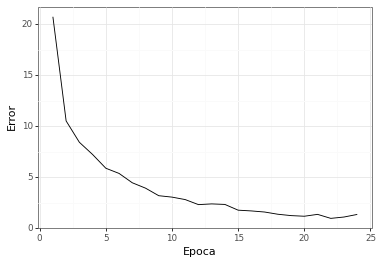

<ggplot: (351834603)>

In [11]:
#Curva de aprendizaje
tempDF=pd.DataFrame(mlp_reg.loss_curve_,columns=["Error-train"])
tempDF["Epoca"]=range(1,tempDF.shape[0]+1)
test_data = pd.DataFrame()


ggplot(tempDF)+aes(x="Epoca",y="Error")+theme_bw()+geom_line()


In [29]:
#Evaluacion
y_pred = mlp_reg.predict(testX_scaled)

df_temp = pd.DataFrame({'Actual': testY, 'Predicted': y_pred})
df_temp.head()

true_value

df_temp.dtypes


Actual        object
Predicted    float64
dtype: object

In [30]:
df_temp["Actual"] = df_temp["Actual"].astype('float64')
df_temp["Actual"]

71483    11.882
15131     7.162
42057     6.715
77662     2.417
44639     2.782
          ...  
14532     1.846
20809     5.690
66224     5.952
11573     4.063
30626     4.550
Name: Actual, Length: 29652, dtype: float64

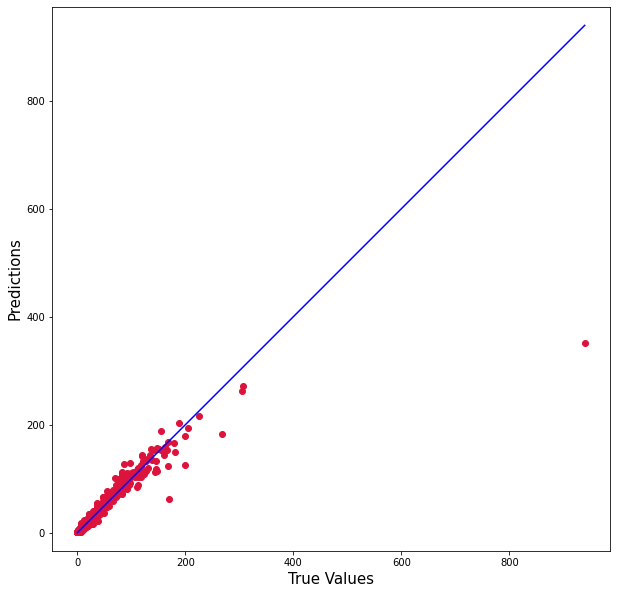

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

true_value = df_temp["Actual"]
predicted_value = df_temp["Predicted"]

plt.scatter(true_value, predicted_value, c='crimson')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()


In [32]:
from sklearn import metrics

print('Mean AbsolallMSETrainute Error:', metrics.mean_absolute_error(testY, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(testY, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, y_pred)))

Mean Absolute Error: 0.5484379207148338
Mean Squared Error: 14.06303562070072
Root Mean Squared Error: 3.750071415413408


In [17]:
sc=StandardScaler()

scaler = sc.fit(trainX)

X_scaled = scaler.transform(x)
X_scaled

y =np.array(y)

array([6.6110000000000015, 4.255, 5.625, ..., 4.148, 2.749, 35.679],
      dtype=object)

In [18]:
#Analizando el error del Perceptron
#Creando los objetos con sus características 
from sklearn.model_selection import KFold
from sklearn import metrics as mt
from sklearn.neural_network import MLPRegressor

numFolds=10

kf = KFold(n_splits=numFolds,shuffle=True)

allMSETrain=np.zeros((numFolds,1))
allMSETest=np.zeros((numFolds,1))
allMAETrain=np.zeros((numFolds,1))
allMAETest=np.zeros((numFolds,1))
index=0

x = train_data[train_features]
y = np.array(train_data["diameter"])


for train_index, test_index in kf.split(x):
    model = MLPRegressor(hidden_layer_sizes=(150,100,50),activation="relu", max_iter=500,early_stopping=True,solver="adam")
    model = model.fit(X_scaled[train_index,:],y[train_index])
    
    prediccion=model.predict(X_scaled[train_index,:])
    
    allMSETrain[index] = mt.mean_squared_error(y[train_index],prediccion)
    prediccion=model.predict(X_scaled[test_index,:])
    allMSETest[index] = mt.mean_squared_error(y[test_index],prediccion)


    """
    allAccTrain[index]=mt.accuracy_score(newTrainY[train_index],prediccion)
    allF1Train[index]=mt.f1_score(newTrainY[train_index],prediccion)
    prediccion=model.predict(newTrainX[test_index,:])
    allAccTest[index]=mt.accuracy_score(newTrainY[test_index],prediccion)
    allF1Test[index]=mt.f1_score(newTrainY[test_index],prediccion)
    """
    
    index+=1
print("Average MSE train error: ",allMSETrain.mean(),"+-",allMSETrain.std())
print("Average MSE test error: ",allMSETest.mean(),"+-",allMSETest.std())
#print("Average ACC test error: ",allAccTest.mean(),"+-",allAccTest.std())
#print("Average F1 test error: ",allF1Test.mean(),"+-",allF1Test.std())

Average MSE train error:  2.408931964231273 +- 1.1745334024008043
Average MSE test error:  6.576350751473297 +- 10.865137798775216


In [26]:
#Analizando el error del Perceptron
#Creando los objetos con sus características 
from sklearn.model_selection import KFold
from sklearn import metrics as mt
from sklearn.neural_network import MLPRegressor

numFolds=10

kf = KFold(n_splits=numFolds,shuffle=True)

allMSETrain=np.zeros((numFolds,1))
allMSETest=np.zeros((numFolds,1))
#allMAETrain=np.zeros((numFolds,1))
#allMAETest=np.zeros((numFolds,1))
index=0

x = train_data[train_features]
y = np.array(train_data["diameter"])


for train_index, test_index in kf.split(x):
    model = MLPRegressor(hidden_layer_sizes=(100,100,100,100,100),activation="relu", max_iter=500,early_stopping=True,solver="adam")
    model = model.fit(X_scaled[train_index,:],y[train_index])
    
    prediccion=model.predict(X_scaled[train_index,:])
    
    allMSETrain[index] = mt.mean_squared_error(y[train_index],prediccion)
    prediccion=model.predict(X_scaled[test_index,:])
    allMSETest[index] = mt.mean_squared_error(y[test_index],prediccion)
    
    index+=1
    
print("Average MSE train error: ",allMSETrain.mean(),"+-",allMSETrain.std())
print("Average MSE test error: ",allMSETest.mean(),"+-",allMSETest.std())
#print("Average ACC test error: ",allAccTest.mean(),"+-",allAccTest.std())
#print("Average F1 test error: ",allF1Test.mean(),"+-",allF1Test.std())

Average MSE train error:  3.7219038601041197 +- 1.8898369736761844
Average MSE test error:  6.722466932052403 +- 8.419469602421685


In [21]:
"""
50,50,20
Average MSE train error:  2.5019766697766963 +- 1.950759734999886
Average MSE test error:  7.578258692821699 +- 12.884491236042217
"""

"""
100,100,100
Average MSE train error:  6.803131358440561 +- 6.4652824649105
Average MSE test error:  11.741163633004373 +- 13.962343227747215
"""

"""
100,100,100
Average MSE train error:  2.781646858187492 +- 0.8203856577434618
Average MSE test error:  9.923491850077227 +- 15.517268432839504
"""

16

In [6]:
#Data preprocecing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = train_data[train_features]
y = train_data["diameter"]

trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.3)

sc=StandardScaler()

scaler = sc.fit(trainX)

trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

In [ ]:
from sklearn import metrics as mt

from sklearn.neural_network import MLPRegressor


epochs = 1000

mlp = MLPRegressor(activation="relu",
                   max_iter=500,
                   solver="adam",
                   early_stopping=True,hidden_layer_sizes=(150,50,30))

training_mse = np.zeros(1000)
validation_mse = np.zeros(1000)

i = 0 
for i in range(1000):
    print(i)
    mlp.fit(trainX_scaled,trainY) 
    Y_pred = mlp.predict(trainX_scaled)
    curr_train_score = mt.mean_squared_error(trainY, Y_pred) # training performances
    print("MSE-TRAIN",curr_train_score)
    Y_pred = mlp.predict(testX_scaled) 
    curr_valid_score = mt.mean_squared_error(testY, Y_pred) # validation performances
    print("MSE-TEST",curr_valid_score)

    training_mse[i] = curr_train_score # list of training perf to plot
    validation_mse[i]= curr_valid_score           # list of valid perf to plot
    i+=1


0
MSE-TRAIN 1.7398906277508606
MSE-TEST 2.271629337337845
1
MSE-TRAIN 1.7835670229127807
MSE-TEST 1.8460455870535901
2
MSE-TRAIN 1.3814765550178594
MSE-TEST 1.9749261551646682
3
MSE-TRAIN 1.4636199234583365
MSE-TEST 1.5875553585073447
4
MSE-TRAIN 2.762106556601758
MSE-TEST 1.8225809268072082
5
MSE-TRAIN 2.0843830314164045
MSE-TEST 1.9851060832538208
6
MSE-TRAIN 5.780854380879462
MSE-TEST 2.03361614332239
7
MSE-TRAIN 1.2691202491911866
MSE-TEST 1.6362484792305847
8
MSE-TRAIN 2.1226631124753306
MSE-TEST 2.2318200699261856
9
MSE-TRAIN 1.0679727777184942
MSE-TEST 1.5838430690251544
10
MSE-TRAIN 1.641531436528895
MSE-TEST 2.42070415015902
11
MSE-TRAIN 3.3379679676002074
MSE-TEST 2.2987968295867836
12
MSE-TRAIN 1.3498288440026074
MSE-TEST 2.203928998185822
13
MSE-TRAIN 2.1844220962025545
MSE-TEST 1.8433231281050757
14
MSE-TRAIN 1.2282855559635388
MSE-TEST 1.9347894158489487
15
MSE-TRAIN 3.539828728274761
MSE-TEST 4.043918452416651
16
MSE-TRAIN 2.8070958920992215
MSE-TEST 1.8752218059324122
1

In [8]:
training_mse

array([ 1.91064858, 10.33447396,  8.30026747,  2.83261792,  1.55123609,
        2.61453969,  1.63090926,  1.67980227,  2.59463886,  1.26616228,
        1.63273402,  4.68928218,  1.25892797,  1.94967723,  1.2942066 ,
        4.59377576,  1.43956164,  1.8939619 ,  1.13246751,  1.34013299,
        3.28054032,  1.01306676,  1.03237154,  2.02995139,  5.69894535])

In [9]:
df_plot = pd.DataFrame({'MSE_train':training_mse, 'MSE_test': validation_mse,'Epoch': range(25)})


df_plot

,MSE_train,MSE_test,Epoch
0,1.910649,2.124525,0
1,10.334474,3.499445,1
2,8.300267,3.276241,2
3,2.832618,2.204098,3
4,1.551236,1.909692,4
5,2.614540,2.165323,5
6,1.630909,1.965750,6
7,1.679802,2.221772,7
8,2.594639,2.333201,8
9,1.266162,1.702789,9


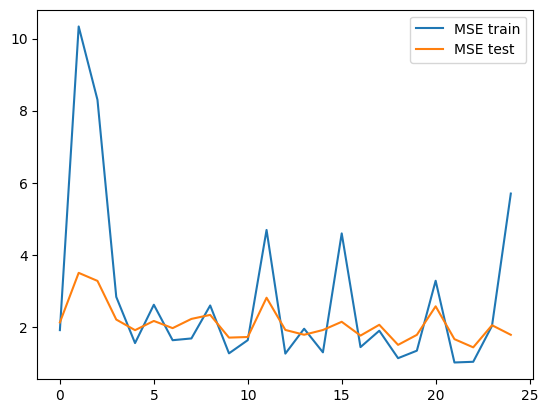

In [16]:

# importing package
import matplotlib.pyplot as plt
  
# create data
  
# plot lines
plt.plot(df_plot["Epoch"], df_plot["MSE_train"], label = "MSE train")
plt.plot(df_plot["Epoch"], df_plot["MSE_test"], label = "MSE test")

plt.legend()
plt.show()